Title: Correlation
Slug: pearsons-correlation-coefficient
Summary: Learn the pearson's correlation  what is correlation in statistics and how to interpet this statistic
Date: 2019-3-5 20:20  
Category: Math
Subcategory: Descriptive Statistics
PostType: Article
Keywords: correlation pandas python
Tags: correlation, scatter, python, pandas
Authors: Dan Friedman

In statistics, the <a href='https://en.wikipedia.org/wiki/Pearson_correlation_coefficient'>**Pearson correlation coefficient**</a> is a measure of the linear relationship between two continuous numerical variables of data. 

In business context, the term *correlation* is used to to describe a relationship between two or more variables. However, this article will just cover the Pearson correlation coefficient. This tutorial will illustrate the concept through simple examples and many visualizations.

### Intro to Pearson Correlation Coefficient

The greek letter $\rho$ stands for the **Pearson's r**, otherwise known as the **correlation coefficient ($\rho$).

The equation for `r` is below. The numerator is the covariance of `x` and `y` - essentially how much they vary together. The denominator is the standard deviation of `x` multipled by the standard deviation of `y` which explains how the two variables vary apart from each other rather than with each other.

$$r=\frac{cov(x, y)}{s_{x} \times s_{y}}$$

$\rho$ is a proportion. $\rho$ measures the strength of a relationship by looking at how closely the observations fall along a straight line. If the data points resemble a perfectly straight line with a positive slope, then $\rho$ is $1$. If the data resembles a perfectly negatively sloped line, then then $\rho$ is $-1$. If the data points are randomly scattered with no resemblence of a perfect line, then $\rho$ is close to $0$. In this instace, there's no linear relationship between the two variables.

Any $\rho$ value closer to the absolute value of $1$ indicates a *strong* linear relationship between the two variables.


### Import Modules

In [4]:
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [21]:
sns.set_context('talk')
sns.set(rc={'figure.figsize':(10.5, 7.5)})
sns.set_style("darkgrid")

### Example to Illustrate Strength of Pearson's $\rho$

Below are two visualizations, labeled *Graph 1* and *Graph 2*. Each shows a scatter plot of the relation of `x` and `y` values.

I'm curious - which two variables have a stronger *positive* linear relationship - *Graph 1* or *Graph 2*?

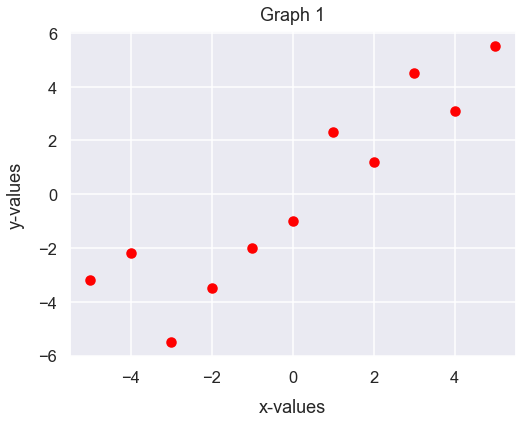

In [17]:
x = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
y = [-3.2, -2.2, -5.5, -3.5, -2, -1, 2.3, 1.2, 4.5, 3.1, 5.5]
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='red')
plt.xlabel("x-values", labelpad=13)
plt.ylabel("y-values", labelpad=13)
plt.title("Graph 1", y=1.015);

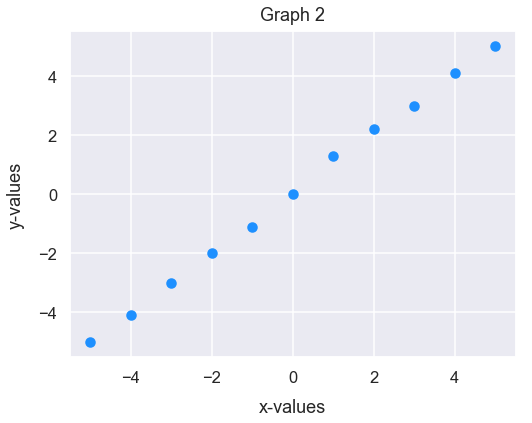

In [18]:
y2 = [-5, -4.1, -3, -2, -1.1, 0, 1.3, 2.2, 3, 4.1, 5]
plt.figure(figsize=(8, 6))
plt.scatter(x, y2, color='dodgerblue')
plt.xlabel("x-values", labelpad=13)
plt.ylabel("y-values", labelpad=13)
plt.title("Graph 2", y=1.015);

The scatter points in *Graph 2* seem to have a stronger positive linear relationship because the scatter points look to resemble a near-perfect line with a positive slope of $1$. In fact, we can figure out the exact Pearson's r of each graph and *Graph 1* indicates a larger value of $0.999$ while *Graph 2* indicates $0.909$.

In [19]:
correlation_x_y, p_value = stats.pearsonr(x, y)
correlation_x_y

0.9087195765173497

In [20]:
correlation_x_y2, p_value2 = stats.pearsonr(x, y2)
correlation_x_y2

0.9994608748837965

### Explanation of Coefficient Values

If the Pearson's r is *positive*, as values from one variable increase, so does the other. 

If the coefficient is *negative*, as values from one variable decrease, the values from the other variable increase. 

The table below provides some examples of coefficient values and explanations.

Pearson's correlation coefficient | Interpretation
--- | ---
0 | There's *no* correlation between the two variables
-0.25 | There's a small *negative* correlation between the two variables
-0.75 | There's a large *negative* correlation between the two variables
-1.0 | There's a perfect *negative* correlation between the two variables 
0.25 | There's a small *positive* correlation between the two variables
0.75 | There's a large *positive* correlation between the two variables
1.0 | There's a perfect *positive* correlation between the two variables 

### Assumption to Prove Correlation

Generally, for both variables compared, we want them to both be approximately normal. The reason for this is that it's unfair to interpret a correlation pattern if we're just looking at extremes of values. 

For example, let's say we want to understand the relationship between income and net worth. We'd initially *assume* there's a positive linear relationship between the two variables: as income increases, net worth increases. However, hypothetically, let's say our dataset just had net income values around 0-20,00 U.S. dollars and 150,000-500,000 U.S. dollars. In this instance, our income values wouldn't represent a normal distribution. We're missing lots of income values between 20,000 and 150,000 U.S. dollars - which I think is a fairly common range for U.S. workers. 

We could still compare income and net worth and we'd likely see the people in that small income range have low net worth values while the people in that much higher net income range have larger net worth values. Yet, it's unfair to interpret correlation between these two variables since we're neglecting a huge portion of people with a certain income and it's biased to connect a relationship between *just* the extremes of income data.

Let's move onto some visual examples now to explain correlation.

### Example 1: Tips Dataset - Total Bill and Tip

#### Get the Data

Let's get the `tips` dataset from the `seaborn` library and assign it to the DataFrame `df_tips`.

In [ ]:
df_tips = sns.load_dataset('tips')

Each row represents a unique meal at a restaurant for a party of people; the dataset contains the following fields:

column name | column description 
--- | ---
`total_bill` | financial amount of meal in U.S. dollars
`tip` |  financial amount of the meal's tip in U.S. dollars
`sex` | gender of server
`smoker` | boolean to represent if server smokes or not
`day` | day of week
`time` | meal name (Lunch or Dinner)
`size` | count of people eating meal

Preview the first 5 rows of `df_tips`. 

In [ ]:
df_tips.head()

#### Plot the Relationship Between Total Bill and Tip Amounts

The plot below has total bill values on the x-axis and tips on the y-axis. 

In [ ]:
df_tips.plot.scatter(x='total_bill', y='tip', s=28, alpha=0.6, c='darkgreen')
plt.xlabel("total bill [$]", labelpad=15)
plt.ylabel("tip [$]", labelpad=15)
plt.title("Total Bill vs. Tips", y=1.015);

There seems to be a large positive correlation between the two variables. As total bill sizes increase, tip values increase too. This is what we'd expect since tips given at restaurants are typically 20% of total bill size, so there's mutual dependence between these two variables.

#### Evaluate the Pearson's Correlation Coefficient Between Tips and Bill Amounts

We can use the `scipy` packages's `stats` module and <a href='https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html'>`pearsonr()` method</a> to compute the Pearson correlation coefficient.

This method returns a list in which the first value is the correlation coefficient. 

Our returned value is 0.68 which confirms our belief that there's a large positive correlation between the two variables.

In [ ]:
round(stats.pearsonr(df_tips['tip'], df_tips['total_bill'])[0], 2)

We can also the use DataFrame method <a href='https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html'>`corr()`</a> from the pandas package to  compute a pairwise correlation of columns. 

There'll always be a perfect positive correlation, a coefficient of 1, for each variable with itself. The 0.68 value below is the same as the one from our calculation with scipy above.

In [ ]:
df_tips[['tip', 'total_bill']].corr()

### Example 2: Diamonds Dataset - Carat and Price

#### Get Diamonds Dataset

Import `diamonds` dataset from Seaborn library and assign to DataFrame `df_diamonds`.

Each row of `df_diamonds` contains details about a specific diamond purchased. We'll just utilize the `price` and `carat` columns below.

In [ ]:
df_diamonds = sns.load_dataset('diamonds')

Preview the first few rows of `df_diamonds`.

In [ ]:
df_diamonds.head()

#### Explanation of carats

`carat` is a unit of measurement in diamonds to characterize its mass. Typically, bigger/heavier diamonds are known to be more expensive.

Here's a helpful image from <a href='https://www.womangettingmarried.com/guide-diamond-carats-prices/'>womengettingmaried.com</a>.

![Image of different carat sizes rings with labels](images/caratguide-500x500.jpg)

#### View Distribution of Carats versus Diamond Prices

The plot below has carats on the x-axis and price on the y-axis. 

In [ ]:
df_diamonds.plot.scatter(x='carat', y='price', s=22, alpha=0.25, c='plum')
plt.xlabel("carats", labelpad=15)
plt.ylabel("price [$]", labelpad=15)
plt.title("Carats versus Price of Diamonds", y=1.015);

There seems to be a large positive correlation between the two variables. As carats increases, price increases too. This is expected since we assume larger/heavier diamonds are priced higher than smaller ones. 

#### Evaluate the Pearson's Correlation Coefficient Between Tips and Bill Amounts

In [ ]:
round(stats.pearsonr(df_diamonds['carat'], df_diamonds['price'])[0], 2)

Our returned value is 0.92 means there's a very strong (nearly perfect) correlation between the two variables.

### Example 3: Titanic Dataset - Age and Fare Price

#### Get Titanic Dataset

Import `titanic` dataset from Seaborn library and assign to DataFrame `df_titanic`.

Each row of `df_titanic` represents details of a passenger of the ship. We'll just utilize the `age` and `fare` columns below. The `fare` column represents the price a passenger paid to board the ship.

In [ ]:
df_titanic = sns.load_dataset('titanic')

Preview the first few rows of `df_titanic`.

In [ ]:
df_titanic.head()

Let's create a new DataFrame assigned to the variable `df_titanic_non_nulls` that filters out the rows in the `age` column that were nulls.

In [ ]:
df_titanic_non_nulls = df_titanic[df_titanic['age'].notnull()==True]

#### View Distribution of Age vs. Fare Prices

The plot below has age in years on the x-axis and price in U.S. dollars on the y-axis.

In [ ]:
df_titanic_non_nulls.plot.scatter(x='age', y='fare', s=22, alpha=0.4, c='darkcyan')
plt.xlabel("age [years]", labelpad=15)
plt.ylabel("fare price [$]", labelpad=15)
plt.title("Titanic Passengers Age [Years] vs. Fare Price [$]", y=1.015);

There seems to be no clear correlation between the two variables. The visualization just illustrates just a bunch of random dots.

#### Evaluate the Pearson's Correlation Coefficient Between Age and Fare Price

In [ ]:
round(stats.pearsonr(df_titanic_non_nulls['age'], df_titanic_non_nulls['fare'])[0], 1)

Our returned value is 0.1 means there's essentially no correlation between the two variables. A change in the value of one variable has no expected change in the value of the other variable.

### Correlation Does Not Imply Causation

One of the most popular terms in the field of statistics is "correlation does not imply causation". A correlation means there's a linear relationship between two variables. A causation connects one process, the *cause*, with another process or state, the *effect*. 

However, this does not mean a change in one variable *causes* a change in the value of the other variable. 

For example, there are studies that have likely proved that increased exercise correlates with a decrease in a person's mass. This is considered to be a strong *negative* correlation between the two variables. This relationship has also likely been proven to be cause-and-effect in which once the activity of exercising takes place, this *causes* the decrease in a person's mass. 

On the other hand, here's a different example mentioned in this <a href='https://en.wikipedia.org/wiki/Correlation_does_not_imply_causation'>Wikipedia article</a>: as ice cream sales increase, the rate of drowning deaths increases sharply. These two variables can be correlated. So as ice cream sales have increased over time, so have drowning deaths so there's a positive linear relationship between the two variables. Yet, it's incredibly unlikely there there's *any causuality relationship* between those two variables since they're so distinct from one another. Rather, people eat more ice cream in warm-weather months and also likely swim more in these months. If more people are swimming, there's likely a greater chance of drowning deaths. The fact is: ice cream consumption *does not cause* drowning. There's lots of other factors to consider in this relationship such as weather.